Objective : To identify online payment fraud

*   Feature:

1. step: represents a unit of time where 1 step equals 1 hour
2. type: type of online transaction
3. amount: the amount of the transaction
4. nameOrig: customer starting the transaction
5. oldbalanceOrg: balance before the transaction
6. newbalanceOrig: balance after the transaction
7. nameDest: recipient of the transaction
8. oldbalanceDest: initial balance of recipient before the transaction
9. newbalanceDest: the new balance of recipient after the transaction
10. isFraud: fraud transaction
11. isFlaggedFraud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data=pd.read_csv('/content/drive/MyDrive/Projects/onlinefraud.csv')

In [3]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
data.shape

(6362620, 11)

In [5]:
data.size

69988820

In [6]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

* Dataset contains no null and nan values



In [7]:
# Exploring transaction type
print(data.type.value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


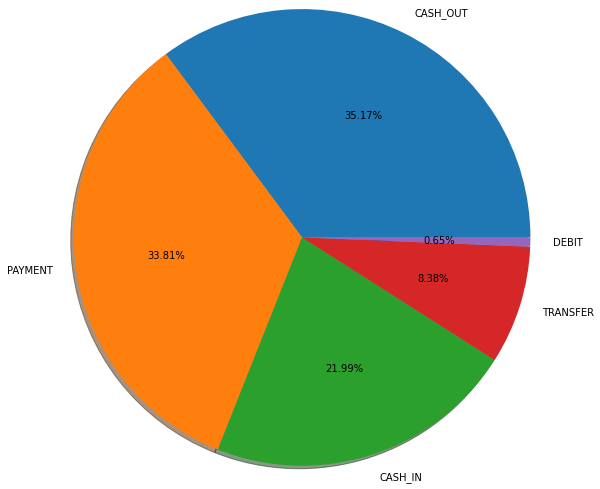

In [8]:
plt.figure(figsize=(15,7))
plt.pie(data['type'].value_counts(),autopct='%.2f%%',shadow=True,radius=1.5,labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'])
plt.show()

In [9]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64



*  Data Is highly imbalanced



Text(0.5, 1.0, '% of Fraud and Not Fraud Customer ')

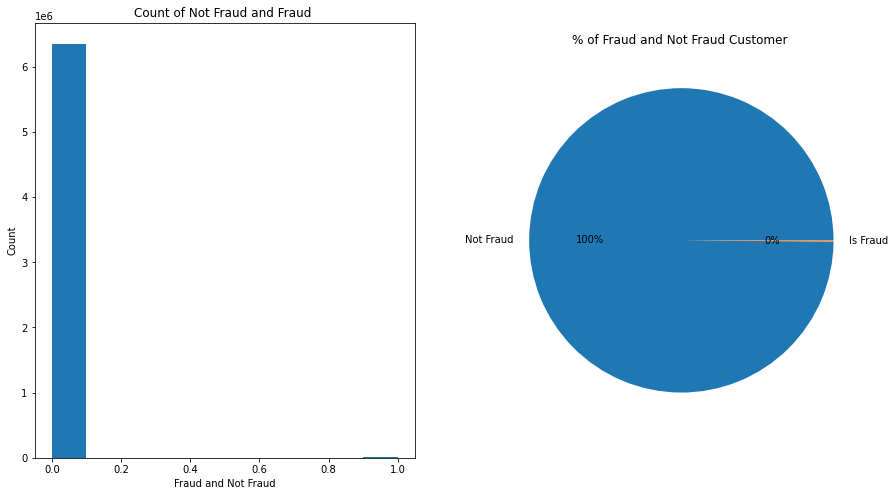

In [10]:
o=data["isFraud"].value_counts()
l1 = ["Not Fraud","Is Fraud"]
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.hist(data["isFraud"])
plt.title("Count of Not Fraud and Fraud ")
plt.xlabel("Fraud and Not Fraud")
plt.ylabel("Count")
plt.subplot(1,2,2)
plt.pie(o,labels =l1 ,autopct ='%1.0f%%')
plt.title("% of Fraud and Not Fraud Customer ")

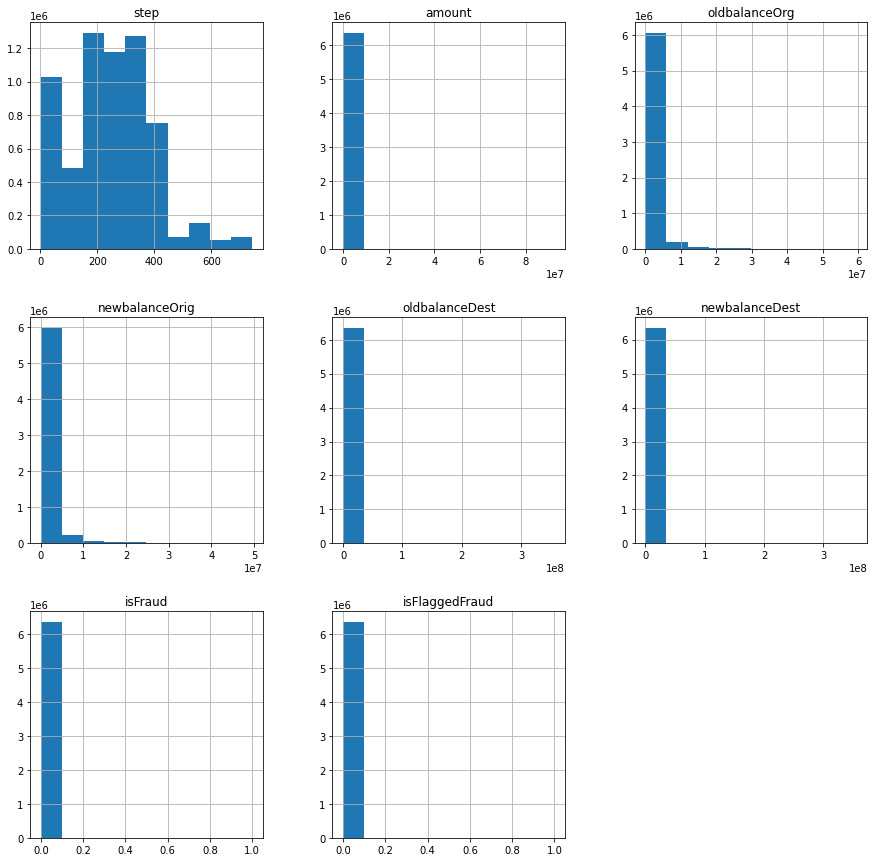

In [11]:
data.hist(figsize = (15,15))
plt.show()

## correlation between the features of the data with the isFraud




In [12]:
# Checking correlation
correlation = data.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [ ]:
sns.pairplot(data, hue ='isFraud')

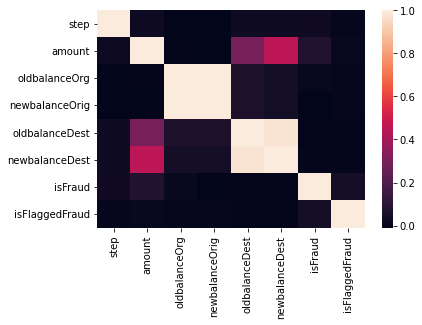

In [13]:
sns.heatmap(data.corr())

## Categorical Data To Numerical Data

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
data['type']=le.fit_transform(data['type'])





1. Cash_out : 1
2. Debit : 2
3. Payment : 3 
4. Transfer : 4
5. Cash_In : 5







## Numerical Data To Categorical Data

In [ ]:
#data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})


In [ ]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,3,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,3,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,3,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,3,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,2,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


## Model BuildIng

In [16]:
# splitting the data
from sklearn.model_selection import train_test_split
X = data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]]
y = data["isFraud"]

In [17]:
y.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

### Under Sampling

In [18]:
# import library
from imblearn.under_sampling import NearMiss

NM = NearMiss()

# fit predictor and target variable
X_nm, y_nm = NM.fit_resample(X, y)


In [19]:
y_nm.value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

In [20]:
import collections

In [21]:
print('Original dataset shape', collections.Counter(y))
print('Resample dataset shape', collections.Counter(y_nm))

Original dataset shape Counter({0: 6354407, 1: 8213})
Resample dataset shape Counter({0: 8213, 1: 8213})


### Spliting Data

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X_nm,y_nm,random_state=123,test_size=0.3,stratify=y_nm)

In [23]:
X_train.shape

(11498, 4)

In [24]:
y_train.shape

(11498,)

In [25]:
X_test.shape

(4928, 4)

In [26]:
y_test.shape

(4928,)

In [27]:
# Model Building 

from sklearn.linear_model import LogisticRegression #Logistic Regression

from sklearn.naive_bayes import GaussianNB #Naive-Bayes 

from sklearn.svm import SVC #Support Vector Machine

from sklearn.tree import DecisionTreeClassifier #Decision Tree

from sklearn.ensemble import RandomForestClassifier #Random Forest

In [28]:
# Testing Model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [29]:
# Define Model

lr = LogisticRegression(solver='lbfgs',multi_class='auto') #LogisticRegression

nb=GaussianNB() #Naive-Bayes

sv=SVC() #Support Vector MAchine

dt=DecisionTreeClassifier() #Decision Tree

rf=RandomForestClassifier() #Random Forest

In [30]:
# Fit Model

lr.fit(X_train, y_train)

nb.fit(X_train, y_train)

sv.fit(X_train, y_train)

dt.fit(X_train, y_train)

rf.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
# Predict Test Set Result

lr_pred=lr.predict(X_test)

nb_pred = nb.predict(X_test)

sv_pred = sv.predict(X_test)

dt_pred = dt.predict(X_test)

rf_pred = rf.predict(X_test)

Confusion Matrix For LogisticRegression :
[[2393   71]
 [ 156 2308]]
F1 Score of Logistic Regression : 0.9531282263060087
Accuracy of Logistic Regression : 0.9539366883116883
Classification Report of Logistic Regression :
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      2464
           1       0.97      0.94      0.95      2464

    accuracy                           0.95      4928
   macro avg       0.95      0.95      0.95      4928
weighted avg       0.95      0.95      0.95      4928



0.9539366883116883

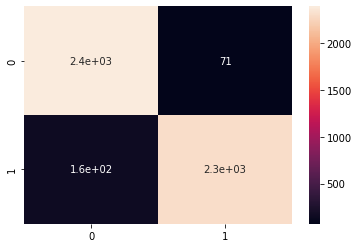

In [32]:
# Evaluate Model - confusion mtrix - LogisticRegression

print("Confusion Matrix For LogisticRegression :")
cm_logistic=confusion_matrix(y_test,lr_pred)
print(cm_logistic)
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True)
print("F1 Score of Logistic Regression :",f1_score(y_test,lr_pred))
print("Accuracy of Logistic Regression :",accuracy_score(y_test,lr_pred))
print("Classification Report of Logistic Regression :\n",classification_report(y_test, lr_pred))
log_reg = lr.score(X_test,y_test)
log_reg 

Confusion Matrix For Naive Bayes :
[[2438   26]
 [ 294 2170]]
F1 Score of Naive Bayes : 0.9313304721030043
Accuracy of Naive Bayes : 0.935064935064935
Classification Report of Naive Bayes :
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      2464
           1       0.99      0.88      0.93      2464

    accuracy                           0.94      4928
   macro avg       0.94      0.94      0.93      4928
weighted avg       0.94      0.94      0.93      4928



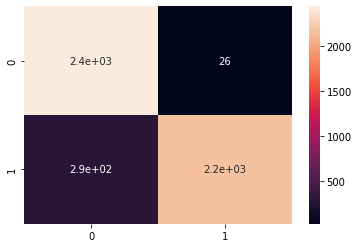

In [33]:
# Evaluate Model - confusion mtrix - Naive Bayes

print("Confusion Matrix For Naive Bayes :")
cm_NB=confusion_matrix(y_test,nb_pred)
print(cm_NB)
sns.heatmap(confusion_matrix(y_test,nb_pred),annot=True)
print("F1 Score of Naive Bayes :",f1_score(y_test,nb_pred))
print("Accuracy of Naive Bayes :",accuracy_score(y_test,nb_pred))
print("Classification Report of Naive Bayes :\n",classification_report(y_test, nb_pred))
nb_score = nb.score(X_test,y_test)


Confusion Matrix For Support Vector MAchine :
[[2447   17]
 [ 339 2125]]
F1 Score of Support Vector MAchine : 0.9227095093356492
Accuracy of Support Vector MAchine : 0.9277597402597403
Classification Report of Support Vector Machine :
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      2464
           1       0.99      0.86      0.92      2464

    accuracy                           0.93      4928
   macro avg       0.94      0.93      0.93      4928
weighted avg       0.94      0.93      0.93      4928



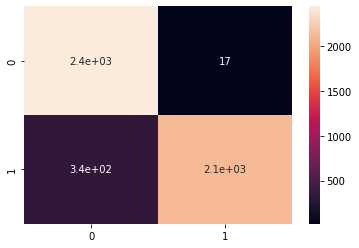

In [34]:
# Evaluate Model - confusion mtrix - Support Vector MAchine

print("Confusion Matrix For Support Vector MAchine :")
cm_svc=confusion_matrix(y_test,sv_pred)
print(cm_svc)
sns.heatmap(confusion_matrix(y_test,sv_pred),annot=True)
print("F1 Score of Support Vector MAchine :",f1_score(y_test,sv_pred))
print("Accuracy of Support Vector MAchine :",accuracy_score(y_test,sv_pred))
print("Classification Report of Support Vector Machine :\n",classification_report(y_test, sv_pred))
sv_score = sv.score(X_test,y_test)


Confusion Matrix For Decision Tree :
[[2417   47]
 [  54 2410]]
F1 Score of Decision Tree : 0.9794757163178216
Accuracy of Decision Tree : 0.9795048701298701
Classification Report of Decision Tree :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2464
           1       0.98      0.98      0.98      2464

    accuracy                           0.98      4928
   macro avg       0.98      0.98      0.98      4928
weighted avg       0.98      0.98      0.98      4928



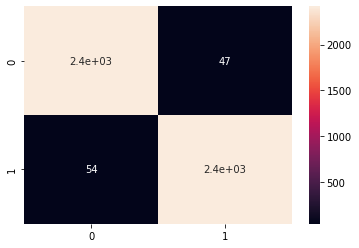

In [35]:
# Evaluate Model - confusion mtrix - Decision Tree

print("Confusion Matrix For Decision Tree :")
cm_dt=confusion_matrix(y_test,dt_pred)
print(cm_dt)
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True)
print("F1 Score of Decision Tree :",f1_score(y_test,dt_pred))
print("Accuracy of Decision Tree :",accuracy_score(y_test,dt_pred))
print("Classification Report of Decision Tree :\n",classification_report(y_test, dt_pred))
dt_score = dt.score(X_test,y_test)


Confusion Matrix For Random Forest :
[[2413   51]
 [  48 2416]]
F1 Score of Random Forest : 0.9799229365240317
Accuracy of Random Forest : 0.9799107142857143
Classification Report of Random Forest :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2464
           1       0.98      0.98      0.98      2464

    accuracy                           0.98      4928
   macro avg       0.98      0.98      0.98      4928
weighted avg       0.98      0.98      0.98      4928



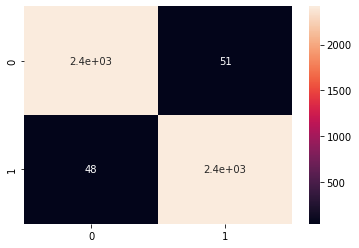

In [36]:
# Evaluate Model - confusion mtrix - Random Forest

print("Confusion Matrix For Random Forest :")
cm_rf=confusion_matrix(y_test,rf_pred)
print(cm_rf)
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True)
print("F1 Score of Random Forest :",f1_score(y_test,rf_pred))
print("Accuracy of Random Forest :",accuracy_score(y_test,rf_pred))
print("Classification Report of Random Forest :\n",classification_report(y_test, rf_pred))
rf_score = rf.score(X_test,y_test)


### Compare Models

In [37]:
model_compare = pd.DataFrame({"Logistic Regression":log_reg,
                            "Naive Bayes":nb_score,
                            "Decision Tree":dt_score,
                            "Random Forest Classifier":rf_score,
                           "Support Vector Machine":sv_score,
                            },index=["accuracy"])

In [38]:
model_compare


,Logistic Regression,Naive Bayes,Decision Tree,Random Forest Classifier,Support Vector Machine
accuracy,0.953937,0.935065,0.979505,0.979911,0.92776


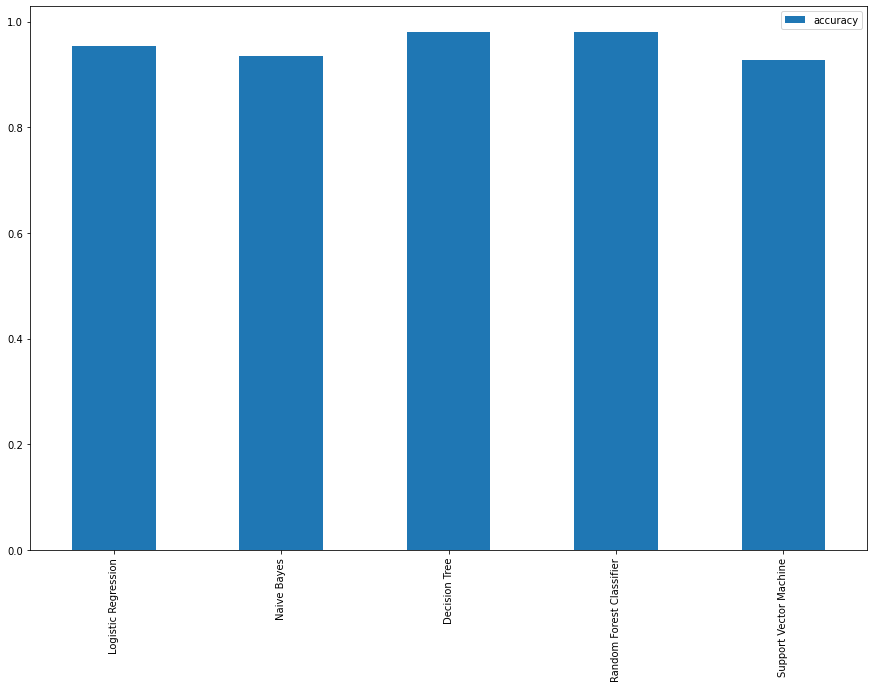

In [39]:
model_compare.T.plot.bar(figsize=(15,10));


## Prediction 

In [40]:
data['isFraud'].sum()/len(data)

0.001290820448180152

* around 0.1% data observations are fact instances of fraud.



In [48]:
# Creating a function for prediction
def predict_fraud(Ttype, amount, oldbalanceOrg, newbalanceOrig):
    Ttype = int(Ttype)
    amount = float(amount)
    oldbalanceOrg = float(oldbalanceOrg)
    newbalanceOrig = float(newbalanceOrig)
    x = [[Ttype, amount, oldbalanceOrg, newbalanceOrig]] #list
    #x = sc_X.transform(x)
    return rf.predict(x)

In [49]:
prediction = predict_fraud(4, 9000.60, 9000.60, 0.0)
if prediction == True:
     print('Oops! Fraud Happened.')
else:
    print("Great! NO Fraud Happen Yet")

Oops! Fraud Happened.


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
